# Import libraries


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import random
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# Loading the excel files-Dates

In [90]:
dates_df = pd.read_csv("Dates.csv")
dates_df.head()
dates_df=dates_df.drop(["ICU_discharge"], axis=1)
dates_df.rename(columns = {'ser_num':'ID'}, inplace = True)
dates_df.head()

,ID,ICU_admission
0,8AF09E0A-B9B4-4903-B372-8EBC4B34664C,08/01/2011 14:51:00
1,2109B44D-7081-4329-B3FB-8DB7C44FF838,11/01/2011 04:45:00
2,9B638A86-4311-4F42-92FB-A38B0E8F0963,12/01/2011 18:54:00
3,DF624881-FF12-4153-9E58-28ACD76E6CCB,16/01/2011 15:17:00
4,FDEF86C4-10E4-49CF-8C01-AA9834718E3E,19/01/2011 10:07:00


In [ ]:
Ree_df['ICU_admission'] = Ree_df['ICU_admission'].astype('datetime64') #changing date types

# Loading the excel files-Ree

In [79]:
xls = pd.ExcelFile(r"REE.xlsx")
Ree_df = pd.read_excel(xls, 'Sheet1')
Ree_df=Ree_df.drop(["PatientId","ParameterName","ValidationTime","ID_hash","ParameterID"], axis=1)
Ree_df.rename(columns = {'h_num_hash':'ID'}, inplace = True)

,ID,Time,Value
0,86E0AE1A-26BC-4791-A1C4-9747DD1B52A4,2011-06-16 11:31:00,1750.0
1,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-21 11:00:00,2030.0
2,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-23 10:10:00,1470.0
3,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-25 19:00:00,1850.0
4,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-26 09:00:00,1890.0


# Adding the date to the Ree DF

In [91]:
Ree_df = pd.merge(Ree_df, dates_df,  how='left', left_on=['ID'], right_on = ['ID'])

In [93]:
Ree_df.head()

,ID,Time,Value,7129,5966,4727,4723,5433,4704,ICU_admission
0,86E0AE1A-26BC-4791-A1C4-9747DD1B52A4,2011-06-16 11:31:00,1750.0,NaN,NaN,NaN,NaN,NaN,NaN,10/06/2011 17:27:00
1,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-21 11:00:00,2030.0,37.51,60.0,127.0,60.00000,84.00001,82.0,20/11/2011 01:55:00
2,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-23 10:10:00,1470.0,NaN,NaN,NaN,NaN,NaN,NaN,20/11/2011 01:55:00
3,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-25 19:00:00,1850.0,37.07,40.0,161.0,78.00004,110.00000,76.0,20/11/2011 01:55:00
4,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-26 09:00:00,1890.0,36.67,250.0,119.0,50.00000,74.00000,70.0,20/11/2011 01:55:00


# Loading the excel files-Vital signs

In [58]:
xls = pd.ExcelFile(r"vital 2011.xlsx")
vitals2011_df = pd.read_excel(xls, 'VITAL SIGNS hash 2011')
xls = pd.ExcelFile(r"vital 2012.xlsx")
vitals2012_df = pd.read_excel(xls, 'VITAL SIGNS hash 2012')
xls = pd.ExcelFile(r"vital 2013.xlsx")
vitals2013_df = pd.read_excel(xls, 'VITAL SIGNS hash 2013')
xls = pd.ExcelFile(r"vital 2014.xlsx")
vitals2014_df = pd.read_excel(xls, 'VITAL SIGNS hash 2014')
xls = pd.ExcelFile(r"vital 2015.xlsx")
vitals2015_df = pd.read_excel(xls, 'VITAL SIGNS hash 2015')
xls = pd.ExcelFile(r"vital 2016.xlsx")
vitals2016_df = pd.read_excel(xls, 'VITAL SIGNS hash 2016')
xls = pd.ExcelFile(r"vital 2017.xlsx")
vitals2017_df = pd.read_excel(xls, 'VITAL SIGNS hash 2017')
xls = pd.ExcelFile(r"vital 2018.xlsx")
vitals2018_df = pd.read_excel(xls, 'Vital signs 2018')
#combining into one big df
vitals_df = pd.concat([vitals2011_df,vitals2012_df,vitals2013_df,vitals2014_df,vitals2015_df,vitals2016_df,vitals2017_df,vitals2018_df])
vitals_df=vitals_df.drop(["para_name"], axis=1)
vitals_df.rename(columns = {'h-num_demo':'ID'}, inplace = True)
vitals_df.rename(columns = {'value_demo':'value'}, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  if sys.path[0] == '':


KeyError: "['para_name'] not found in axis"

In [69]:
vitals_df.head()

,ID,para_code,time,value
0,86E0AE1A-26BC-4791-A1C4-9747DD1B52A4,4704,2011-06-10 17:30:00,80.0
1,86E0AE1A-26BC-4791-A1C4-9747DD1B52A4,4704,2011-06-10 19:00:00,70.0
2,86E0AE1A-26BC-4791-A1C4-9747DD1B52A4,4704,2011-06-10 20:00:00,89.0
3,86E0AE1A-26BC-4791-A1C4-9747DD1B52A4,4704,2011-06-10 22:00:00,92.0
4,86E0AE1A-26BC-4791-A1C4-9747DD1B52A4,4704,2011-06-11 00:00:00,88.0


# Arrange each vital sign in a data frame

In [70]:
df_4704=vitals_df[vitals_df['para_code'] == 4704] #hr דופק
df_7129=vitals_df[vitals_df['para_code'] == 7129] #temperature טמפרטורה
df_5966=vitals_df[vitals_df['para_code'] == 5966] #Urine Output תפוקת שתן
df_4727=vitals_df[vitals_df['para_code'] == 4727] #Central Venous Pressure לחץ ורידי מרכזי
df_4723=vitals_df[vitals_df['para_code'] == 4723] #Arterial Pressure Diastolic לחץ-דם דיאסטולי עורקי
df_5433=vitals_df[vitals_df['para_code'] == 5433] #Arterial Pressure Mean לחץ דם ממוצע עורקי

# Presenting the outliers

In [71]:
num_outliers_4704 = len(df_4704[df_4704['value'] < 20]) +  len(df_4704[df_4704['value'] > 250])
print('the number of rows in 4704 is', len(df_4704))
print('the number of outliers in 4704 is' , num_outliers_4704)
print()
num_outliers_4723 = len(df_4723[df_4723['value'] < 15]) +  len(df_4723[df_4723['value'] > 175])
print('the number of rows in 4723 is', len(df_4723))
print('the number of ouliers in 4723 is', num_outliers_4723)
print()
num_outliers_4727=len(df_4727[df_4727['value'] < 30]) +  len(df_4727[df_4727['value'] > 250])
print('the number of rows in 4727 is', len(df_4727))
print('the number of ouliers in 4727 is', num_outliers_4727)
print()
num_outliers_5433 = len(df_5433[df_5433['value'] < 15]) +  len(df_5433[df_5433['value'] > 200])
print('the number of rows in 5433 is', len(df_5433))
print('the number of ouliers in 5433 is', num_outliers_5433)
print()
num_outliers_7129 = len(df_7129[df_7129['value'] < 32]) +  len(df_7129[df_7129['value'] > 44])
print('the number of rows in 7129 is', len(df_7129))
print('the number of ouliers in 7129 is', num_outliers_7129)
print()
num_outliers_5966 = len(df_5966[df_5966['value'] < 0]) +  len(df_5966[df_5966['value'] > 1500])
print('the number of rows in 5966 is', len(df_5966))
print('the number of ouliers in 5966 is', num_outliers_5966)


the number of rows in 4704 is 846705
the number of outliers in 4704 is 771

the number of rows in 4723 is 735602
the number of ouliers in 4723 is 2656

the number of rows in 4727 is 735790
the number of ouliers in 4727 is 1944

the number of rows in 5433 is 731874
the number of ouliers in 5433 is 3478

the number of rows in 7129 is 836962
the number of ouliers in 7129 is 7944

the number of rows in 5966 is 785867
the number of ouliers in 5966 is 20


# Removing the outliers

In [72]:
df_4704.loc[df_4704.value > 250, 'value'] = np.nan
df_4704.loc[df_4704.value < 20, 'value'] = np.nan

df_4723.loc[df_4723.value > 175, 'value'] = np.nan
df_4723.loc[df_4723.value < 15, 'value'] = np.nan

df_4727.loc[df_4727.value > 250, 'value'] = np.nan
df_4727.loc[df_4727.value < 30, 'value'] = np.nan

df_5433.loc[df_5433.value > 200, 'value'] = np.nan
df_5433.loc[df_5433.value < 15, 'value'] = np.nan

df_7129.loc[df_7129.value > 44, 'value'] = np.nan
df_7129.loc[df_7129.value < 32, 'value'] = np.nan

df_5966.loc[df_5966.value > 1500, 'value'] = np.nan
df_5966.loc[df_5966.value < 0, 'value'] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [80]:
Ree_df.head()

,ID,Time,Value
0,86E0AE1A-26BC-4791-A1C4-9747DD1B52A4,2011-06-16 11:31:00,1750.0
1,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-21 11:00:00,2030.0
2,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-23 10:10:00,1470.0
3,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-25 19:00:00,1850.0
4,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-26 09:00:00,1890.0


In [74]:
df_5966.head()

,ID,para_code,time,value
339,86E0AE1A-26BC-4791-A1C4-9747DD1B52A4,5966,2011-06-10 18:00:00,50.0
340,86E0AE1A-26BC-4791-A1C4-9747DD1B52A4,5966,2011-06-10 23:00:00,250.0
341,86E0AE1A-26BC-4791-A1C4-9747DD1B52A4,5966,2011-06-11 02:00:00,70.0
342,86E0AE1A-26BC-4791-A1C4-9747DD1B52A4,5966,2011-06-11 06:00:00,100.0
343,86E0AE1A-26BC-4791-A1C4-9747DD1B52A4,5966,2011-06-11 08:00:00,50.0


# Merging the dataframes

In [83]:
Ree_df = pd.merge(Ree_df, df_7129,  how='left', left_on=['ID','Time'], right_on = ['ID','time'])
Ree_df=Ree_df.drop(["para_code","time"],axis=1)
Ree_df=Ree_df.rename(columns = {'value':'7129'})

Ree_df = pd.merge(Ree_df, df_5966,  how='left', left_on=['ID','Time'], right_on = ['ID','time'])
Ree_df=Ree_df.drop(["para_code","time"],axis=1)
Ree_df=Ree_df.rename(columns = {'value':'5966'})

Ree_df = pd.merge(Ree_df, df_4727,  how='left', left_on=['ID','Time'], right_on = ['ID','time'])
Ree_df=Ree_df.drop(["para_code","time"],axis=1)
Ree_df=Ree_df.rename(columns = {'value':'4727'})

Ree_df = pd.merge(Ree_df, df_4723,  how='left', left_on=['ID','Time'], right_on = ['ID','time'])
Ree_df=Ree_df.drop(["para_code","time"],axis=1)
Ree_df=Ree_df.rename(columns = {'value':'4723'})

Ree_df = pd.merge(Ree_df, df_5433,  how='left', left_on=['ID','Time'], right_on = ['ID','time'])
Ree_df=Ree_df.drop(["para_code","time"],axis=1)
Ree_df=Ree_df.rename(columns = {'value':'5433'})

Ree_df = pd.merge(Ree_df, df_4704,  how='left', left_on=['ID','Time'], right_on = ['ID','time'])
Ree_df=Ree_df.drop(["para_code","time"],axis=1)
Ree_df=Ree_df.rename(columns = {'value':'4704'})


In [85]:
Ree_df.head()

,ID,Time,Value,7129,5966,4727,4723,5433,4704
0,86E0AE1A-26BC-4791-A1C4-9747DD1B52A4,2011-06-16 11:31:00,1750.0,NaN,NaN,NaN,NaN,NaN,NaN
1,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-21 11:00:00,2030.0,37.51,60.0,127.0,60.00000,84.00001,82.0
2,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-23 10:10:00,1470.0,NaN,NaN,NaN,NaN,NaN,NaN
3,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-25 19:00:00,1850.0,37.07,40.0,161.0,78.00004,110.00000,76.0
4,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-26 09:00:00,1890.0,36.67,250.0,119.0,50.00000,74.00000,70.0


In [89]:
Ree_df.describe()

,Value,7129,5966,4727,4723,5433,4704
count,3160.000000,2115.000000,2125.000000,2007.000000,2008.000000,2008.000000,2148.000000
mean,1963.995491,37.216950,89.933647,126.932237,60.200199,81.528884,91.627561
std,580.396030,0.879959,72.317312,27.484235,15.752595,17.673425,20.166448
min,0.000000,32.170000,0.000000,40.000000,27.000000,38.000000,31.000000
25%,1577.500000,36.689990,50.000000,108.000000,50.000000,69.000000,77.000000
50%,1900.000000,37.240000,70.000000,123.000000,58.000000,79.000020,90.000000
75%,2270.000000,37.810000,100.000000,144.000050,68.000000,91.000030,105.000000
max,13990.000000,40.170000,600.000000,230.000000,173.000000,178.000000,178.000000


In [99]:
Ree_df.dtypes

ID                       object
Time             datetime64[ns]
Value                   float64
7129                    float64
5966                    float64
4727                    float64
4723                    float64
5433                    float64
4704                    float64
ICU_admission    datetime64[ns]
dtype: object

# Building the Hour Counter

In [100]:
Ree_df['Hour_counter'] = (Ree_df['Time'] - Ree_df['ICU_admission']).dt.total_seconds() / 60 / 60

# Adding Names to each column

In [109]:
Ree_df.rename(columns={'Value': 'REE'}, inplace=True)
Ree_df.rename(columns={'7129': 'Temperature'}, inplace=True)
Ree_df.rename(columns={'5966': 'Urine_Output'}, inplace=True)
Ree_df.rename(columns={'4727': 'Central_VP'}, inplace=True)
Ree_df.rename(columns={'4723': 'Arterial_PD'}, inplace=True)
Ree_df.rename(columns={'5433': 'Arterial_PM'}, inplace=True)
Ree_df.rename(columns={'4704': 'Heart_Rate'}, inplace=True)


# Final data frame

In [110]:
Ree_df

,ID,Time,REE,Temperature,Urine_Output,Central_VP,Arterial_PD,Arterial_PM,Heart_Rate,ICU_admission,Hour_counter
0,86E0AE1A-26BC-4791-A1C4-9747DD1B52A4,2011-06-16 11:31:00,1750.0,NaN,NaN,NaN,NaN,NaN,NaN,2011-10-06 17:27:00,-2693.933333
1,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-21 11:00:00,2030.0,37.51,60.0,127.00000,60.00000,84.00001,82.0,2011-11-20 01:55:00,33.083333
2,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-23 10:10:00,1470.0,NaN,NaN,NaN,NaN,NaN,NaN,2011-11-20 01:55:00,80.250000
3,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-25 19:00:00,1850.0,37.07,40.0,161.00000,78.00004,110.00000,76.0,2011-11-20 01:55:00,137.083333
4,B2F09172-C954-4027-BEE8-500430BCF561,2011-11-26 09:00:00,1890.0,36.67,250.0,119.00000,50.00000,74.00000,70.0,2011-11-20 01:55:00,151.083333
...,...,...,...,...,...,...,...,...,...,...,...
3425,DEA5E2F2-F17D-4606-B055-988BC13B7FCF,2018-06-13 09:00:00,1450.0,37.10,150.0,108.00000,65.99999,80.00000,98.0,2018-05-25 16:06:00,448.900000
3426,36E0832A-9E45-4F03-9A27-C32A50212389,2018-02-03 13:00:00,1440.0,37.83,30.0,NaN,NaN,NaN,89.0,2018-01-29 15:27:00,117.550000
3427,3040B0E4-8AFC-4B4C-9D1D-BBA92E2E02BC,2018-07-10 12:00:00,1870.0,37.64,200.0,153.99990,96.99999,110.00000,74.0,2018-06-29 20:10:00,255.833333
3428,3040B0E4-8AFC-4B4C-9D1D-BBA92E2E02BC,2018-07-11 10:00:00,2620.0,38.04,70.0,122.00000,92.00002,102.00000,87.0,2018-06-29 20:10:00,277.833333


In [111]:
features = ['REE', 'Temperature', 'Urine_Output', 'Central_VP', 'Arterial_PD', 'Arterial_PM',
       'Heart_Rate']

# Heatmap

<AxesSubplot:>

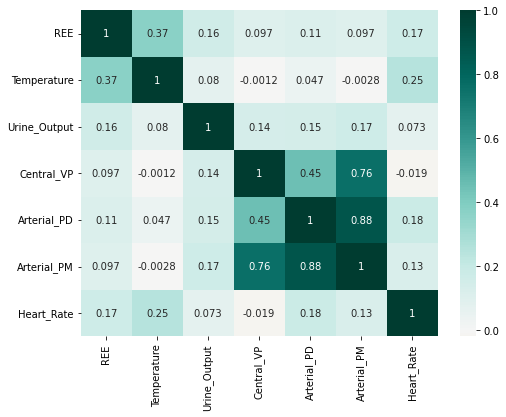

In [112]:
Ree_df.rename(columns={'Value': 'REE'}, inplace=True)
corrs = Ree_df[features].corr(method = 'pearson')
plt.figure(figsize=(8,6))  #figure size
sns.heatmap(corrs, cmap='BrBG', center=0, annot = True )

# Boxplots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='REE'>

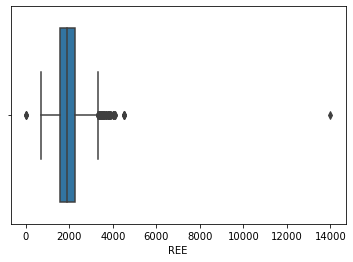

In [114]:
sns.boxplot(Ree_df['REE'])

ID               FFE533F1-B644-4079-A602-52BD59D785E0
Time                              2018-11-29 22:00:00
REE                                           13990.0
Temperature                                     40.17
Urine_Output                                    600.0
Central_VP                                      230.0
Arterial_PD                                     173.0
Arterial_PM                                     178.0
Heart_Rate                                      178.0
ICU_admission                     2018-12-08 17:44:00
Hour_counter                              7998.233333
dtype: object

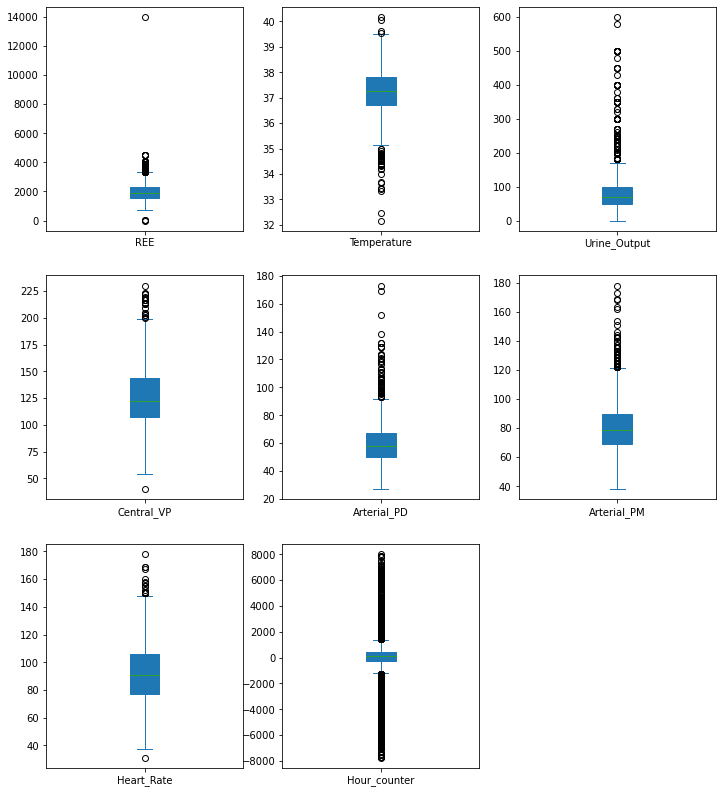

In [115]:
Ree_df.plot(subplots=True, layout=(3,3), kind='box', figsize=(12,14), patch_artist=True)
Ree_df.max()

# Scatter plots

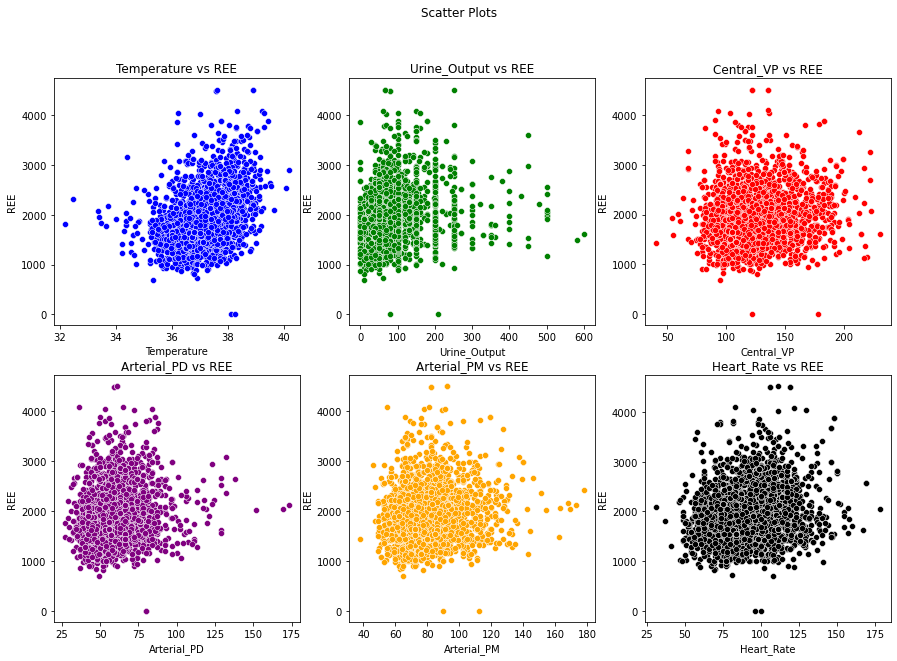

In [117]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

sns.scatterplot(x='Temperature', y='REE', data=Ree_df, ax=axs[0][0],sizes=(3, 3), color="blue")
sns.scatterplot(x='Urine_Output', y='REE', data=Ree_df, ax=axs[0][1],sizes=(3, 3), color="green")
sns.scatterplot(x='Central_VP', y='REE', data=Ree_df, ax=axs[0][2],sizes=(3, 3), color="red")
sns.scatterplot(x='Arterial_PD', y='REE', data=Ree_df, ax=axs[1][0],sizes=(3, 3), color="purple")
sns.scatterplot(x='Arterial_PM', y='REE', data=Ree_df, ax=axs[1][1],sizes=(3, 3), color="orange")
sns.scatterplot(x='Heart_Rate', y='REE', data=Ree_df, ax=axs[1][2],sizes=(3, 3), color="black")

plt.suptitle('Scatter Plots')

axs[0][0].set_title('Temperature vs REE')
axs[0][1].set_title('Urine_Output vs REE')
axs[0][2].set_title('Central_VP vs REE')
axs[1][0].set_title('Arterial_PD vs REE')
axs[1][1].set_title('Arterial_PM vs REE')
axs[1][2].set_title('Heart_Rate vs REE')

plt.show()

# Distribution plots

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

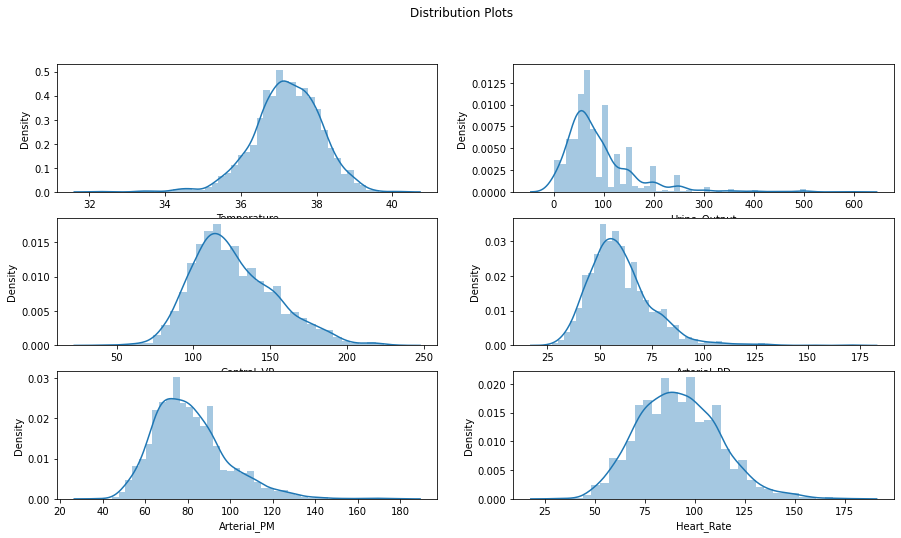

In [118]:
fig, axs = plt.subplots(3, 2, figsize=(15, 8))

sns.distplot(Ree_df['Temperature'], ax=axs[0][0])
sns.distplot(Ree_df['Urine_Output'], ax=axs[0][1])
sns.distplot(Ree_df['Central_VP'], ax=axs[1][0])
sns.distplot(Ree_df['Arterial_PD'], ax=axs[1][1])
sns.distplot(Ree_df['Arterial_PM'], ax=axs[2][0])
sns.distplot(Ree_df['Heart_Rate'], ax=axs[2][1])
plt.suptitle('Distribution Plots')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='REE', ylabel='Density'>

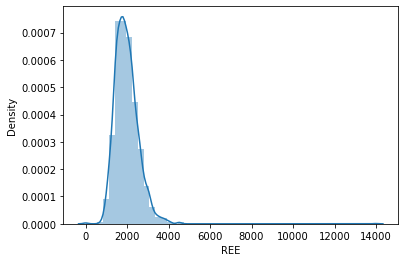

In [119]:
sns.distplot(Ree_df['REE'])

# Machine Learning models

In [123]:
temp=Ree_df.dropna()
#Spliting the data in to train and test data
x = temp[['Temperature', 'Urine_Output','Heart_Rate']]
y = temp['REE']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# LinearRegression model

In [124]:

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("Linear Regression MSE: ", mse)
print("Linear Regression R2: ", r2)
print("Linear Regression MAE: ", mae)
print("Linear Regression EVS: ", evs)

Linear Regression MSE:  257986.46974437975
Linear Regression R2:  0.1943389516788948
Linear Regression MAE:  391.6988574156269
Linear Regression EVS:  0.19560498768882784


# RidgeRegression model

In [125]:
ridge = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(ridge, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best alpha: ", grid_search.best_params_)

Best alpha:  {'alpha': 1}


In [127]:
# Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("Ridge Regression MSE: ", mse)
print("Ridge Regression R2: ", r2)
print("Ridge Regression MAE: ", mae)
print("Ridge Regression EVS: ", evs)

Ridge Regression MSE:  258006.42324795446
Ridge Regression R2:  0.1942766392614118
Ridge Regression MAE:  391.71911605043044
Ridge Regression EVS:  0.19554258942380898


# Lasso Regression model

In [128]:
lasso = LassoCV()
lasso.fit(x_train, y_train)
print("Best alpha: ", lasso.alpha_)

Best alpha:  7.272767072695317


In [129]:

lasso = Lasso(alpha=lasso.alpha_)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("Lasso Regression MSE: ", mse)
print("Lasso Regression R2: ", r2)
print("Lasso Regression MAE: ", mae)
print("Lasso Regression EVS: ", evs)

Lasso Regression MSE:  259148.8585945905
Lasso Regression R2:  0.19070894960729212
Lasso Regression MAE:  392.8789005353194
Lasso Regression EVS:  0.19197155043232428


# Random Forest Regression

In [130]:

random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("Random Forest Regression MSE: ", mse)
print("Random Forest Regression R2: ", r2)
print("Random Forest Regression MAE: ", mae)
print("Random Forest Regression EVS: ", evs)

Random Forest Regression MSE:  241005.44562726747
Random Forest Regression R2:  0.24736866949825997
Random Forest Regression MAE:  375.79648249999997
Random Forest Regression EVS:  0.25006922320821523


# Gradient Boosting Regression

In [131]:

gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(x_train, y_train)
y_pred = gradient_boosting.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("Gradient Boosting Regression MSE: ", mse)
print("Gradient Boosting Regression R2: ", r2)
print("Gradient Boosting Regression MAE: ", mae)
print("Gradient Boosting Regression EVS: ", evs)


Gradient Boosting Regression MSE:  239861.66254411475
Gradient Boosting Regression R2:  0.25094056797316
Gradient Boosting Regression MAE:  373.2553308143909
Gradient Boosting Regression EVS:  0.2514503860305777


# MLP Regressor

In [132]:
mlp = MLPRegressor()
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("MLPRegressor Regression MSE: ", mse)
print("MLPRegressor Regression R2: ", r2)
print("MLPRegressor Regression MAE: ", mae)
print("MLPRegressor Regression EVS: ", evs)

MLPRegressor Regression MSE:  311579.50599120895
MLPRegressor Regression R2:  0.02697427628288207
MLPRegressor Regression MAE:  441.641453911899
MLPRegressor Regression EVS:  0.02714536213479979


C:\Users\oritre\AppData\Roaming\Python\Python37\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
